In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('UCI_Credit_Card.csv')

In [3]:
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df.shape

(30000, 25)

In [5]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [6]:
df.columns=df.columns.str.replace(".","_")

In [7]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')

In [8]:
df.default_payment_next_month.unique().sum()

1

In [9]:
df.default_payment_next_month.value_counts()

0    23364
1     6636
Name: default_payment_next_month, dtype: int64

In [10]:
df= df.iloc[:,1:]

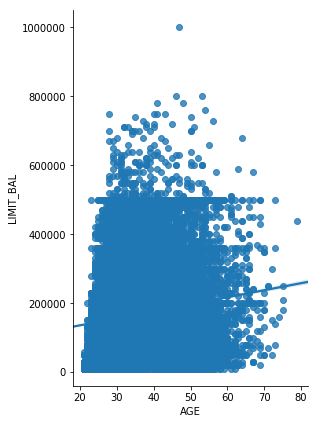

In [11]:
sns.pairplot(df,x_vars=['AGE'],y_vars='LIMIT_BAL',aspect = 0.7, size = 6,kind = 'reg')

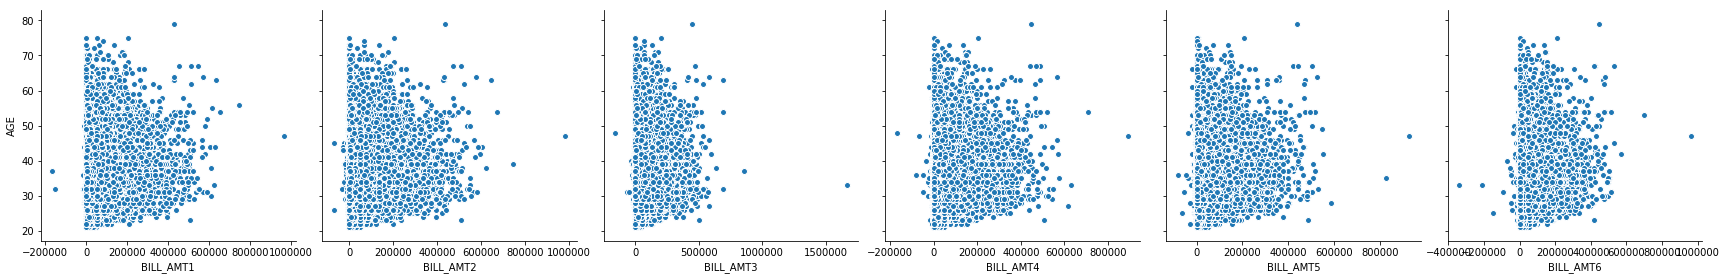

In [12]:
sns.pairplot (df,y_vars = 'AGE', x_vars = ['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], size=4)

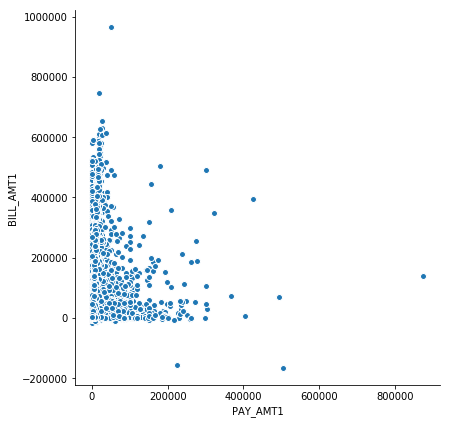

In [13]:
sns.pairplot(df, y_vars =['BILL_AMT1'], x_vars =['PAY_AMT1'], size = 6)

In [14]:
df_age = df.loc[:,['AGE','default_payment_next_month']]

In [15]:
df_age.AGE.unique()

array([24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47,
       33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 63, 36,
       52, 48, 55, 60, 50, 75, 61, 73, 59, 21, 67, 66, 62, 70, 72, 64, 65,
       71, 69, 68, 79, 74], dtype=int64)

In [16]:
df_age.AGE.sort_values()

12305    21
21720    21
7984     21
21719    21
27662    21
8490     21
8850     21
15154    21
6429     21
16988    21
13705    21
3308     21
5483     21
4390     21
3147     21
7859     21
6733     21
14103    21
12924    21
16999    21
15728    21
4485     21
21736    21
1471     21
7183     21
21576    21
7141     21
3284     21
25182    21
21598    21
         ..
12888    69
5512     69
11766    69
9376     69
9014     69
1583     70
29145    70
21361    70
7932     70
17740    70
20310    70
21363    70
1505     70
9386     70
5824     70
6023     71
27541    71
2104     71
1644     72
25142    72
20264    72
29163    73
10699    73
29179    73
387      73
29175    74
25136    75
25141    75
246      75
18245    79
Name: AGE, Length: 30000, dtype: int64

In [17]:
df_age.AGE.value_counts

<bound method IndexOpsMixin.value_counts of 0        24
1        26
2        34
3        37
4        57
5        37
6        29
7        23
8        28
9        35
10       34
11       51
12       41
13       30
14       29
15       23
16       24
17       49
18       49
19       29
20       39
21       39
22       26
23       40
24       23
25       23
26       27
27       30
28       47
29       26
         ..
29970    34
29971    36
29972    37
29973    35
29974    37
29975    41
29976    47
29977    34
29978    39
29979    32
29980    42
29981    44
29982    36
29983    44
29984    38
29985    30
29986    35
29987    34
29988    34
29989    35
29990    41
29991    34
29992    43
29993    38
29994    34
29995    39
29996    43
29997    37
29998    41
29999    46
Name: AGE, Length: 30000, dtype: int64>

In [18]:
mybins = range (0, df_age.AGE.max(),5)
df_age['age_bin'] = pd.cut(df_age.AGE, bins=mybins)
df_age.age_bin.value_counts


<bound method IndexOpsMixin.value_counts of 0        (20, 25]
1        (25, 30]
2        (30, 35]
3        (35, 40]
4        (55, 60]
5        (35, 40]
6        (25, 30]
7        (20, 25]
8        (25, 30]
9        (30, 35]
10       (30, 35]
11       (50, 55]
12       (40, 45]
13       (25, 30]
14       (25, 30]
15       (20, 25]
16       (20, 25]
17       (45, 50]
18       (45, 50]
19       (25, 30]
20       (35, 40]
21       (35, 40]
22       (25, 30]
23       (35, 40]
24       (20, 25]
25       (20, 25]
26       (25, 30]
27       (25, 30]
28       (45, 50]
29       (25, 30]
           ...   
29970    (30, 35]
29971    (35, 40]
29972    (35, 40]
29973    (30, 35]
29974    (35, 40]
29975    (40, 45]
29976    (45, 50]
29977    (30, 35]
29978    (35, 40]
29979    (30, 35]
29980    (40, 45]
29981    (40, 45]
29982    (35, 40]
29983    (40, 45]
29984    (35, 40]
29985    (25, 30]
29986    (30, 35]
29987    (30, 35]
29988    (30, 35]
29989    (30, 35]
29990    (40, 45]
29991    (30, 35]
29

In [19]:
df_age.columns

Index(['AGE', 'default_payment_next_month', 'age_bin'], dtype='object')

In [20]:
mybins

range(0, 79, 5)

In [21]:
mybins = range (df_age.AGE.unique().min(), df_age.AGE.unique().max(),5)
df_age['age_bin'] = pd.cut(df_age.AGE, bins=mybins)
df_age.age_bin.value_counts

<bound method IndexOpsMixin.value_counts of 0        (21, 26]
1        (21, 26]
2        (31, 36]
3        (36, 41]
4        (56, 61]
5        (36, 41]
6        (26, 31]
7        (21, 26]
8        (26, 31]
9        (31, 36]
10       (31, 36]
11       (46, 51]
12       (36, 41]
13       (26, 31]
14       (26, 31]
15       (21, 26]
16       (21, 26]
17       (46, 51]
18       (46, 51]
19       (26, 31]
20       (36, 41]
21       (36, 41]
22       (21, 26]
23       (36, 41]
24       (21, 26]
25       (21, 26]
26       (26, 31]
27       (26, 31]
28       (46, 51]
29       (21, 26]
           ...   
29970    (31, 36]
29971    (31, 36]
29972    (36, 41]
29973    (31, 36]
29974    (36, 41]
29975    (36, 41]
29976    (46, 51]
29977    (31, 36]
29978    (36, 41]
29979    (31, 36]
29980    (41, 46]
29981    (41, 46]
29982    (31, 36]
29983    (41, 46]
29984    (36, 41]
29985    (26, 31]
29986    (31, 36]
29987    (31, 36]
29988    (31, 36]
29989    (31, 36]
29990    (36, 41]
29991    (31, 36]
29

In [22]:
mybins

range(21, 79, 5)

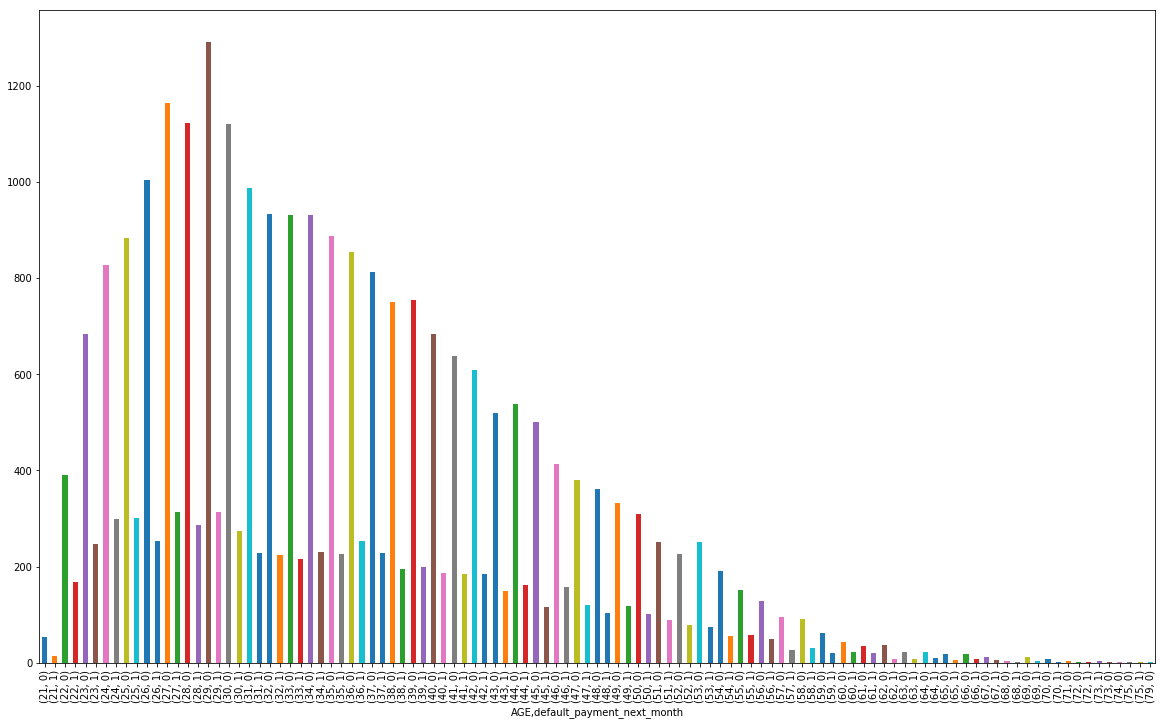

In [23]:
plt.figure(figsize = (20,12))
df_age.groupby('AGE').default_payment_next_month.value_counts().plot('bar')

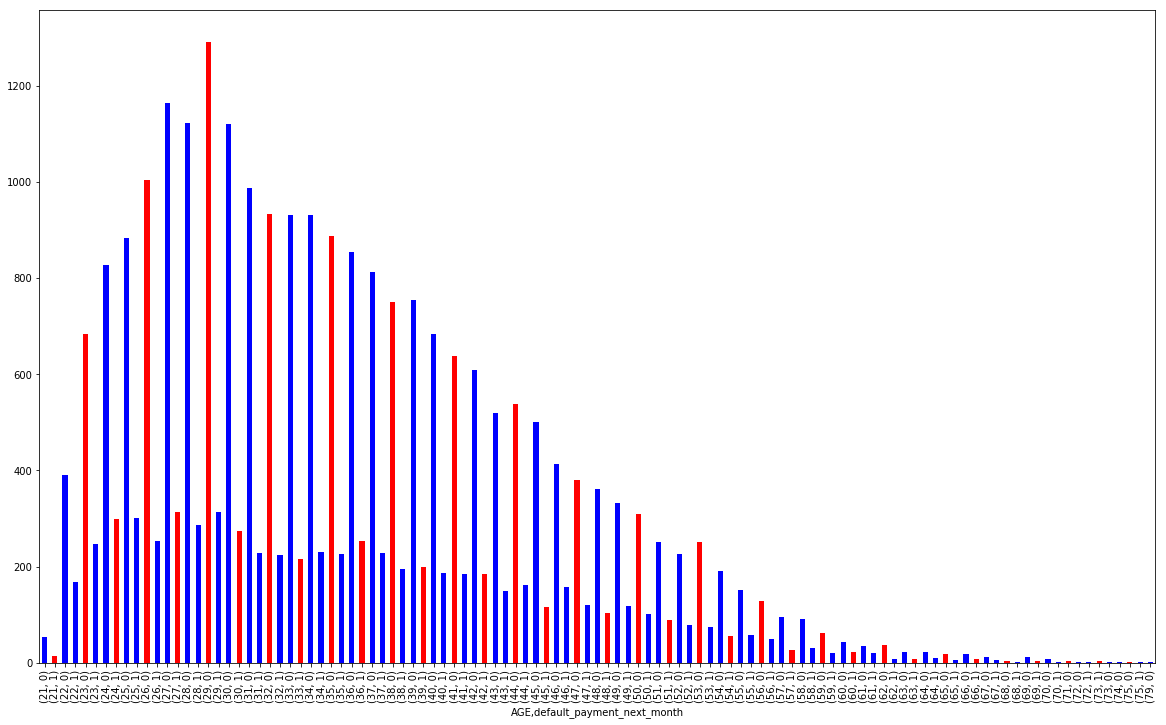

In [24]:
plt.figure(figsize = (20,12))
df_age.groupby('AGE').default_payment_next_month.value_counts().plot('bar', color = ('b','r'))

1 refers to people who paid 


0 refers to people who are defaulters

In [25]:
df_age.default_payment_next_month.value_counts()

0    23364
1     6636
Name: default_payment_next_month, dtype: int64

In [26]:
df_age.groupby('AGE').default_payment_next_month.value_counts()

AGE  default_payment_next_month
21   0                               53
     1                               14
22   0                              391
     1                              169
23   0                              684
     1                              247
24   0                              827
     1                              300
25   0                              884
     1                              302
26   0                             1003
     1                              253
27   0                             1164
     1                              313
28   0                             1123
     1                              286
29   0                             1292
     1                              313
30   0                             1121
     1                              274
31   0                              988
     1                              229
32   0                              933
     1                              225
33   0  

berlin = df.['SEX', 'EDUCATION', 'MARRIAGE']
bread = range(0:len(berlin))
for i in bread:
    df.groupby(berlin[i]).default_payment_next_month.value_counts()
    

In SEX : 1 =male and 2=Female

In [27]:
df.groupby('SEX').default_payment_next_month.value_counts()

SEX  default_payment_next_month
1    0                              9015
     1                              2873
2    0                             14349
     1                              3763
Name: default_payment_next_month, dtype: int64

In MARRIAGE: 1 = married, 2 = single, 3 = others

In [28]:
df.groupby('MARRIAGE').default_payment_next_month.value_counts()

MARRIAGE  default_payment_next_month
0         0                                49
          1                                 5
1         0                             10453
          1                              3206
2         0                             12623
          1                              3341
3         0                               239
          1                                84
Name: default_payment_next_month, dtype: int64

1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown

In [29]:
df.groupby('EDUCATION').default_payment_next_month.value_counts()

EDUCATION  default_payment_next_month
0          0                                14
1          0                              8549
           1                              2036
2          0                             10700
           1                              3330
3          0                              3680
           1                              1237
4          0                               116
           1                                 7
5          0                               262
           1                                18
6          0                                43
           1                                 8
Name: default_payment_next_month, dtype: int64

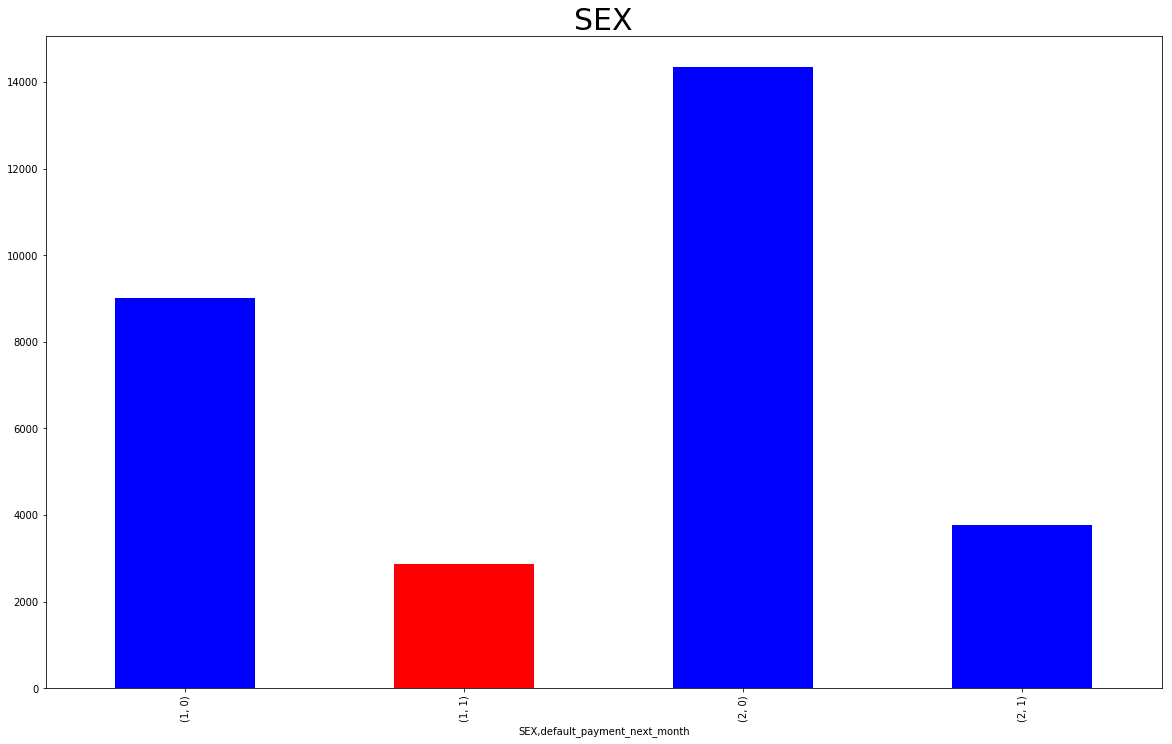

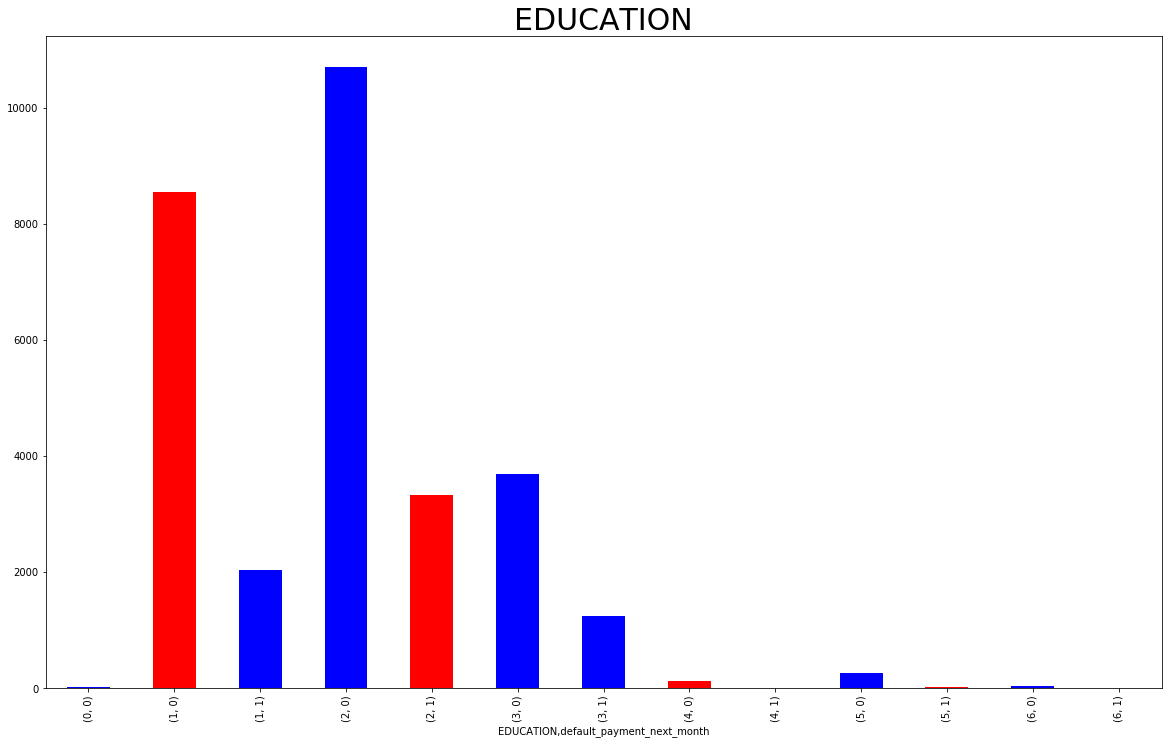

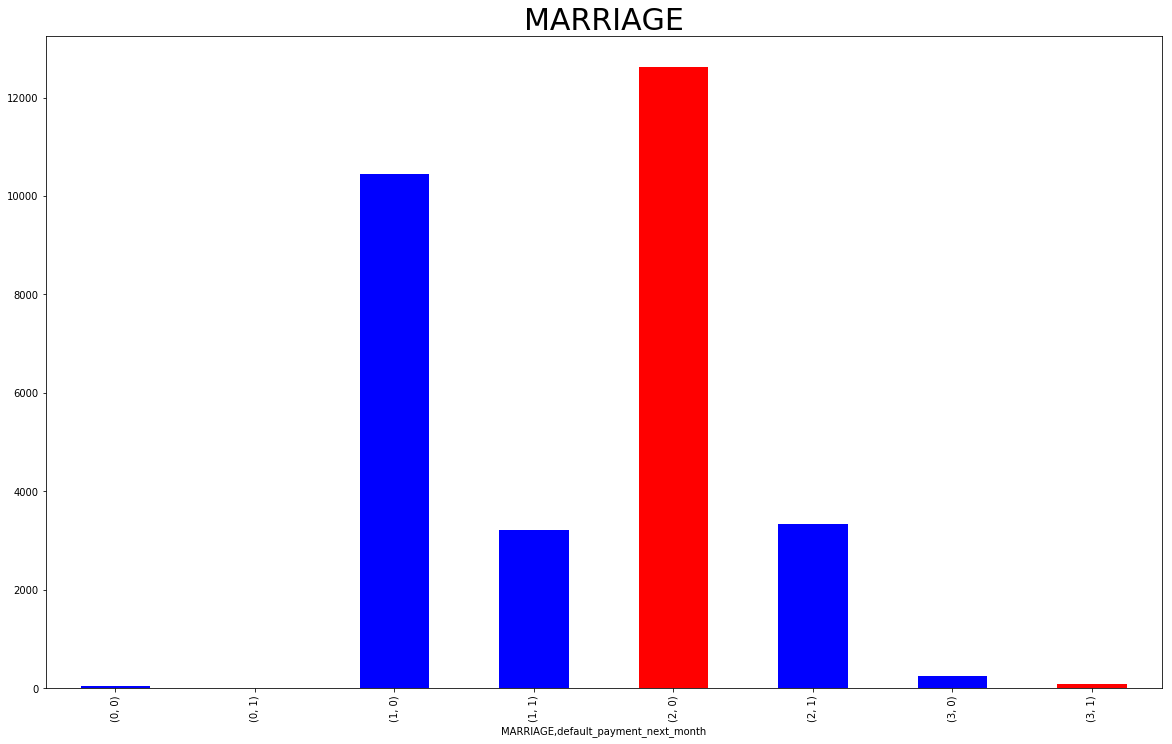

In [65]:
berlin = list(df.columns[1:4])
bread = range(0,len(berlin))

for i in bread:
    plt.figure(figsize = (20,12))
    df.groupby(berlin[i]).default_payment_next_month.value_counts().plot('bar', color = ('b','r'))
    plt.title( berlin[i], fontsize = 30)

In [78]:
df = df.loc[:,['SEX', 'EDUCATION', 'MARRIAGE', 'AGE','LIMIT_BAL','mean_bill', 'mean_pay','default_payment_next_month']]

In [101]:
x = df.iloc[:,0 : -1]

In [103]:
y = df.iloc[:,[-1]]

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [105]:
clf = DecisionTreeClassifier

In [113]:
clf_entropy = clf(criterion = 'entropy', random_state = 42,max_depth =3, min_samples_leaf = 5)
clf_entropy

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [108]:
clf_entropy.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [110]:
y_pred = clf_entropy.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [112]:
accuracy_score(y_test,y_pred)*100

78.22222222222223

In [33]:
df.factorize()

AttributeError: 'DataFrame' object has no attribute 'factorize'

In [37]:
x = df.loc[:,[ 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']]

In [48]:
y = df.loc[:,['default_payment_next_month']]

In [60]:
df['mean_bill'] = df.loc[:,['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)

In [62]:
df['mean_pay'] = df.loc[:,['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mean(axis=1)

In [63]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month', 'mean_bill', 'mean_pay'],
      dtype='object')

In [ ]:
x = 

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 42)

In [51]:
x_train.shape

(22500, 4)

In [52]:
y_train.shape

(22500, 1)

In [53]:
linreg = LinearRegression

In [57]:
linreg.fit(x_train,y_train)

TypeError: fit() missing 3 required positional arguments: 'self', 'X', and 'y'

In [66]:
bread2 = list(df.columns)
yam = range(len(bread2))
yams = list(zip(yam,bread2))

In [72]:
range(len(df.columns))

range(0, 26)

In [73]:
yams

[(0, 'LIMIT_BAL'),
 (1, 'SEX'),
 (2, 'EDUCATION'),
 (3, 'MARRIAGE'),
 (4, 'AGE'),
 (5, 'PAY_0'),
 (6, 'PAY_2'),
 (7, 'PAY_3'),
 (8, 'PAY_4'),
 (9, 'PAY_5'),
 (10, 'PAY_6'),
 (11, 'BILL_AMT1'),
 (12, 'BILL_AMT2'),
 (13, 'BILL_AMT3'),
 (14, 'BILL_AMT4'),
 (15, 'BILL_AMT5'),
 (16, 'BILL_AMT6'),
 (17, 'PAY_AMT1'),
 (18, 'PAY_AMT2'),
 (19, 'PAY_AMT3'),
 (20, 'PAY_AMT4'),
 (21, 'PAY_AMT5'),
 (22, 'PAY_AMT6'),
 (23, 'default_payment_next_month'),
 (24, 'mean_bill'),
 (25, 'mean_pay')]